In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_csv('solar.csv')
dataset.columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
dataset

,y,x1,x2,x3,x4,x5
0,271.8,783.35,33.53,40.55,16.66,13.20
1,264.0,748.45,36.50,36.19,16.46,14.11
2,238.8,684.45,34.66,37.31,17.66,15.68
3,230.7,827.80,33.13,32.52,17.50,10.53
4,251.6,860.45,35.75,33.71,16.40,11.00
5,257.9,875.15,34.46,34.14,16.28,11.31
6,263.9,909.45,34.60,34.85,16.06,11.96
7,266.5,905.55,35.38,35.89,15.93,12.58
8,229.1,756.00,35.85,33.53,16.60,10.66
9,239.3,769.35,35.68,33.79,16.41,10.85


a) Fit a smiple linear regression model

In [10]:
y = dataset['y'].to_numpy()
x = dataset['x4'].to_numpy()

In [11]:
n = len(y)
s_xy = sum(x*y) - sum(y) * sum(x) / n
s_xx = sum(x**2) - sum(x)**2 / n
b1_hat = s_xy / s_xx
b0_hat = np.average(y) - b1_hat * np.average(x)
print(f'y_hat = {round(b0_hat, 4)} + ({round(b1_hat, 4)} * x_4)')

y_hat = 607.1033 + (-21.4025 * x_4)


In [12]:
print(f'range x: {min(x), max(x)}')

range x: (15.54, 19.05)


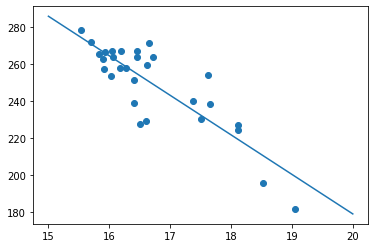

In [13]:
reg_x = np.linspace(15,20,100)
reg_y = [reg_x_i * b1_hat + b0_hat for reg_x_i in reg_x]
plt.plot(reg_x, reg_y)
plt.scatter(x, y)
plt.show()

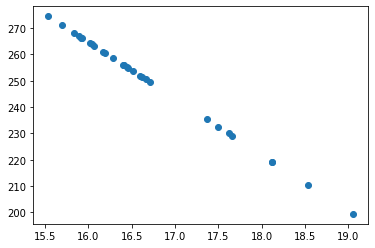

In [14]:
y_hat = x * b1_hat + b0_hat
plt.scatter(x, y_hat)
plt.title('predictions')

b1) analysis of variance table and regression significance
TABLE IS AT THE END OF THE EXERCISE

In [25]:
y_avg = np.average(y)
ss_t = sum((y - y_avg)**2)
ss_r = sum((y_hat - y_avg)**2)
ss_res = sum((y - y_hat)**2)
print('ss_t = ', ss_t)
print('ss_r + ss_res = ', ss_r + ss_res)

ss_t =  14681.928275862072
ss_r + ss_res =  14681.928275858669


In [26]:
F0 = ss_r / (ss_res / (n-2))
print('F0 = ', F0)

F0 =  69.60943685588529


In [29]:
from scipy.stats import f
f_critical_value = abs(f.ppf(0.99, 1, n-2))

In [31]:
print(f'Significant regression at alpha=0.99: {F0 > f_critical_value}')

Significant regression at alpha=0.99: True


c) 95% CI on the slope

In [32]:
from scipy.stats import t
alpha = 0.05
t_value = abs(t.ppf(alpha/2, n-2))
ms_res = ss_res / (n - 2)
se_b1 = np.sqrt(ms_res/s_xx)

In [33]:
b1_ci = (b1_hat - t_value * se_b1, b1_hat + t_value * se_b1)
print('CI = ', b1_ci)

CI =  (-26.66591534504273, -16.13900123377123)


d) calculate R^2

In [34]:
r2 = ss_r / ss_t
print('R^2 =', r2)

R^2 = 0.7205241964064782


e) 95% CI on the mean heat flux when radial deflection is 16.5

In [35]:
x0 = 16.5
mu_y_given_x0 = b0_hat + b1_hat * x0
mu_y_given_x0

253.96270364054908

In [37]:
sqrt_term = np.sqrt(ms_res * (1/n + (x0 - np.average(x))**2/s_xx))
mu_ci = (mu_y_given_x0 - t_value * sqrt_term, mu_y_given_x0 + t_value * sqrt_term)
print('CI =', mu_ci)

CI = (249.14675201289307, 258.7786552682051)


b2) ANOVA table

In [38]:
anova_df = pd.DataFrame(columns = ['Sum of squares', 'DoF', 'Mean Square', 'F0'],
             index = ['Regression', 'Residual', 'Total'])
anova_df.loc['Regression', 'Sum of squares'] = ss_r
anova_df.loc['Regression', 'DoF'] = 1
anova_df.loc['Regression', 'Mean Square'] = ss_r / 1
anova_df.loc['Regression', 'F0'] = F0

anova_df.loc['Residual', 'Sum of squares'] = ss_res
anova_df.loc['Residual', 'DoF'] = n-2
anova_df.loc['Residual', 'Mean Square'] = ms_res

anova_df.loc['Total', 'Sum of squares'] = ss_t
anova_df.loc['Total', 'DoF'] = n-1
anova_df

,Sum of squares,DoF,Mean Square,F0
Regression,10578.684573,1,10578.684573,69.609437
Residual,4103.243703,27,151.971989,NaN
Total,14681.928276,28,NaN,NaN
